## Perspectief 1

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go


link to dataset3: https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle

In [2]:
df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns', None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df2 = pd.read_csv("diabetes_prediction_dataset.csv")
pd.set_option('display.max_columns', None)
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
concatenated_df = pd.concat([df, df2], axis=0, ignore_index=True)

concatenated_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
100764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
100765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
100766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [5]:
df2 = df2.rename(columns={'bmi': 'BMI'})
df = df.rename(columns={'Outcome': 'diabetes'})
df2 = df2.rename(columns={'blood_glucose_level': 'Glucose'})
merged_df = pd.merge(df, df2, on=['BMI', 'Glucose'], how='outer')

merged_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes_x,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,diabetes_y
0,6.0,148,72.0,35.0,0.0,33.60,0.627,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,85,66.0,29.0,0.0,26.60,0.351,31.0,0.0,Female,58.0,0.0,0.0,never,4.8,0.0
2,1.0,85,66.0,29.0,0.0,26.60,0.351,31.0,0.0,Female,13.0,0.0,0.0,never,6.6,0.0
3,1.0,85,66.0,29.0,0.0,26.60,0.351,31.0,0.0,Female,48.0,0.0,0.0,No Info,3.5,0.0
4,8.0,183,64.0,0.0,0.0,23.30,0.672,32.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100699,NaN,126,NaN,NaN,NaN,37.71,NaN,NaN,NaN,Male,32.0,0.0,0.0,ever,6.1,0.0
100700,NaN,85,NaN,NaN,NaN,20.96,NaN,NaN,NaN,Male,80.0,1.0,0.0,No Info,6.6,0.0
100701,NaN,160,NaN,NaN,NaN,34.34,NaN,NaN,NaN,Female,26.0,0.0,0.0,never,6.5,0.0
100702,NaN,155,NaN,NaN,NaN,40.69,NaN,NaN,NaN,Female,40.0,0.0,0.0,never,3.5,0.0


In [6]:
df3 = pd.read_csv("ss.csv")
df3['BMI Category'] = df3['BMI Category'].replace('Normal Weight', 'Normal')
df3


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


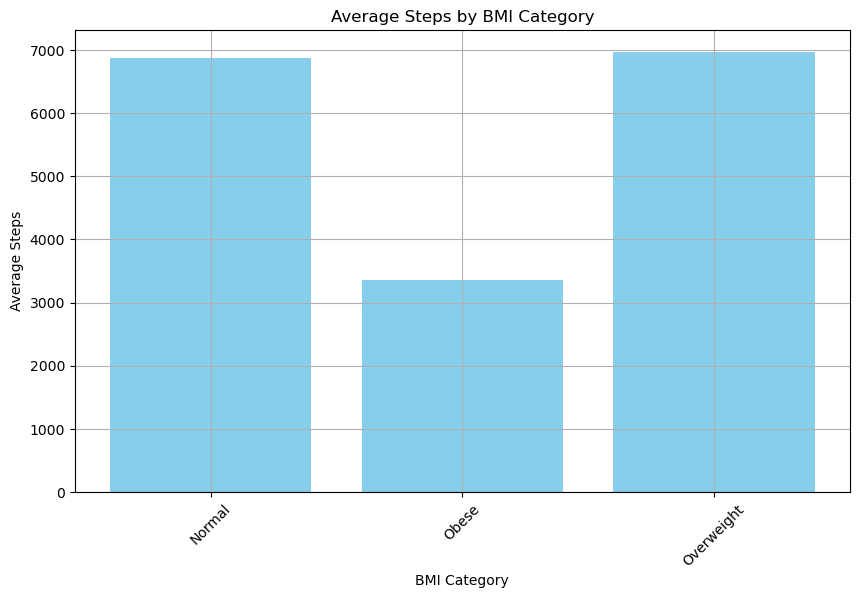

In [7]:
steps_by_bmi = df3.groupby('BMI Category')['Daily Steps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Daily Steps'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Average Steps')
plt.title('Average Steps by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

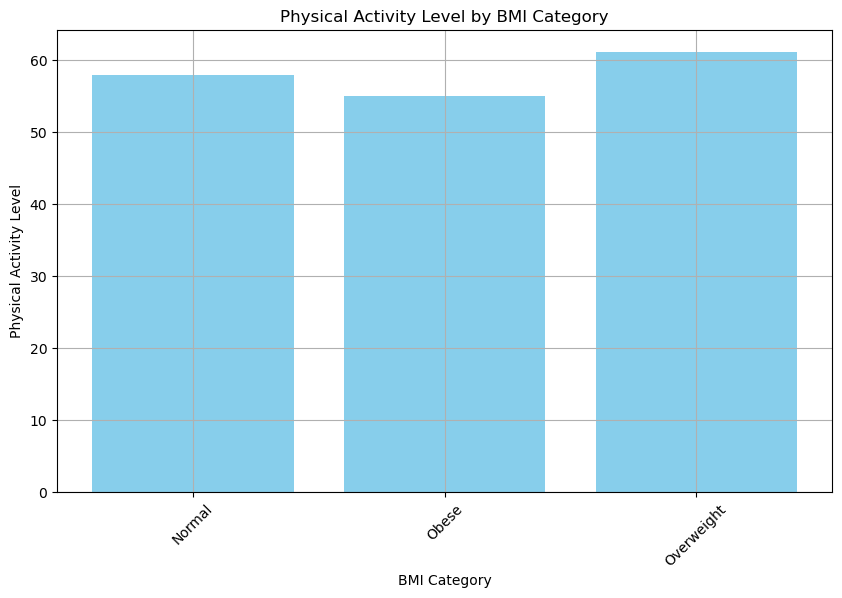

In [8]:
steps_by_bmi = df3.groupby('BMI Category')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
def convert_bp_to_average(bp):
    systolic, diastolic = map(int, bp.split('/'))
    return (systolic + diastolic) / 2

# Apply the function to the 'Blood Pressure' column
df3['Average Blood Pressure'] = df3['Blood Pressure'].apply(convert_bp_to_average)
df3

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Average Blood Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,104.5
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,102.5
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,102.5
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,115.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,117.5


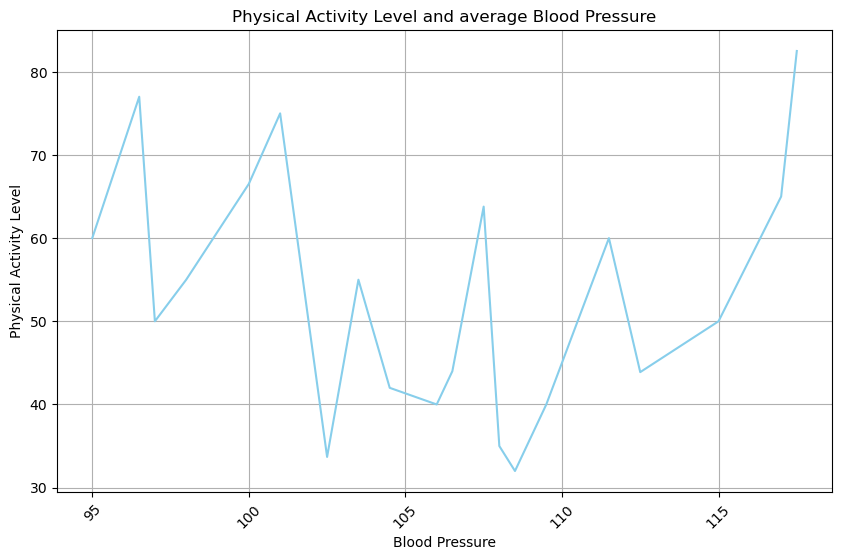

In [10]:
steps_by_bmi = df3.groupby('Average Blood Pressure')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(steps_by_bmi['Average Blood Pressure'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('Blood Pressure')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level and average Blood Pressure')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

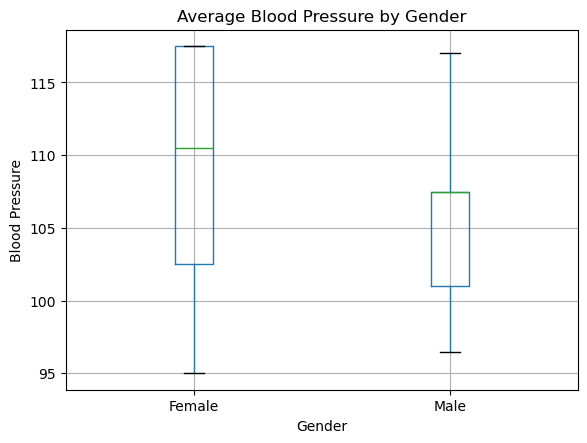

In [11]:
# Create box plot
plt.figure(figsize=(10, 6))
df3.boxplot(column='Average Blood Pressure', by='Gender')
plt.title('Average Blood Pressure by Gender')
plt.suptitle('')  # Suppress the default title to keep it clean
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

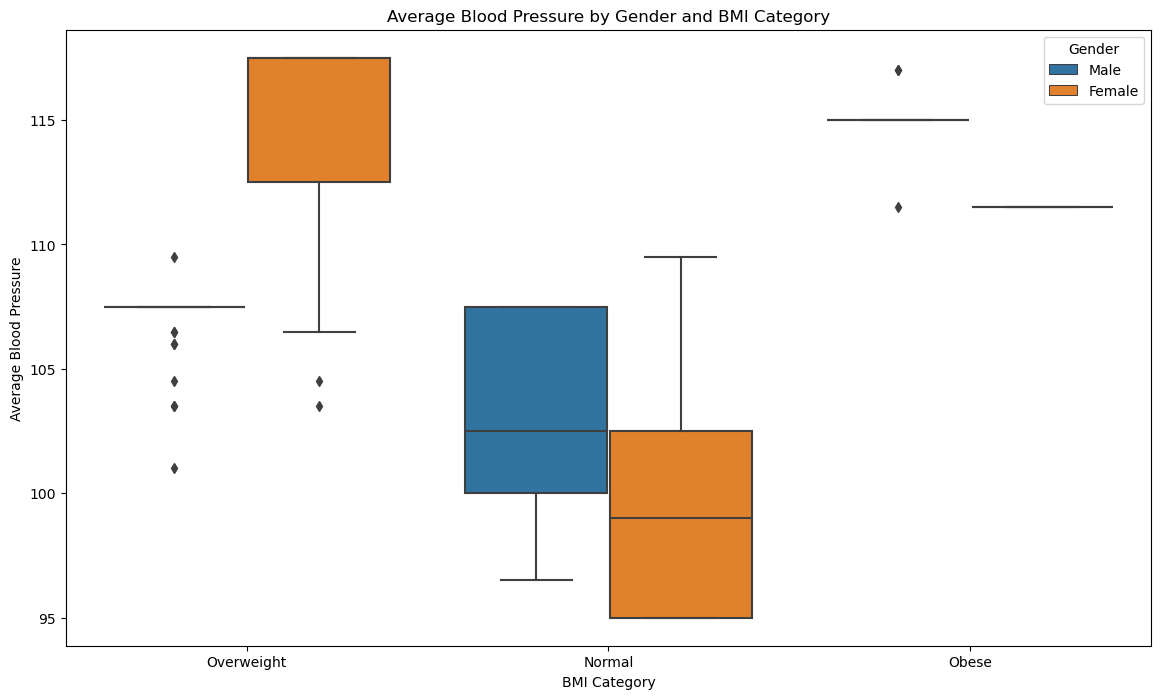

In [12]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='BMI Category', y='Average Blood Pressure', hue='Gender', data=df3)
ax.set_title('Average Blood Pressure by Gender and BMI Category')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Average Blood Pressure')
plt.legend(title='Gender', loc='upper right')
plt.show()

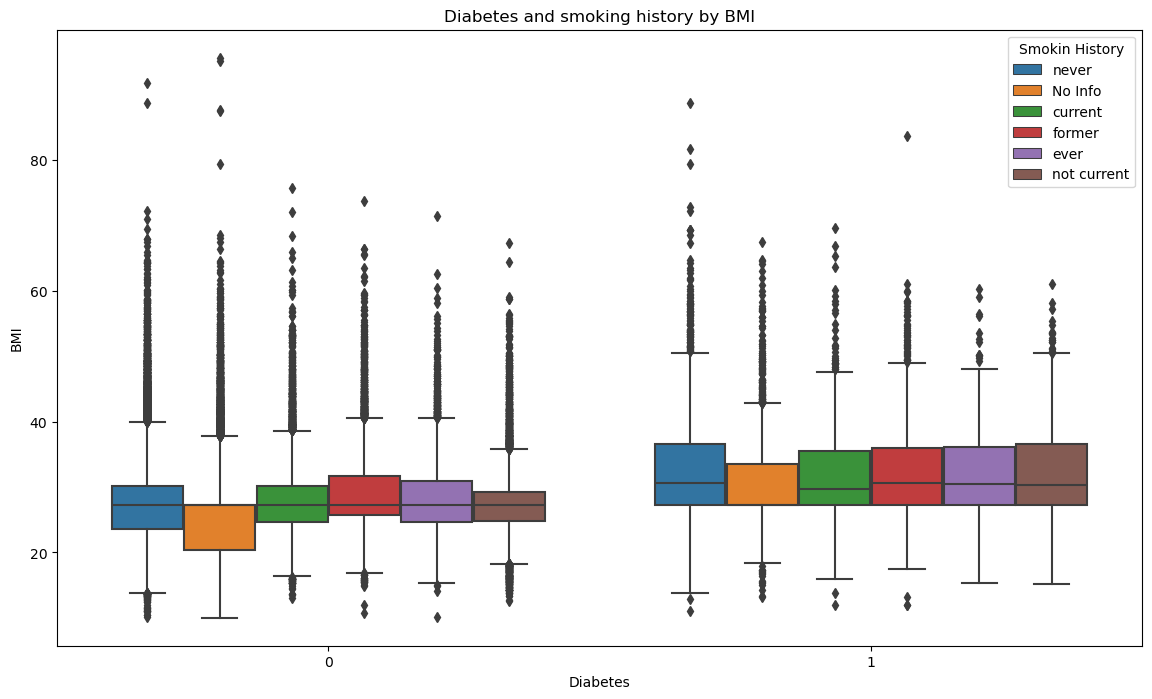

In [17]:
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='diabetes', y='BMI', hue='smoking_history', data=df2)
ax.set_title('Diabetes and smoking history by BMI')
ax.set_xlabel('Diabetes')
ax.set_ylabel('BMI')
plt.legend(title='Smokin History', loc='upper right')
plt.show()